In [1]:
'''df = pd.read_csv('tracks.csv', low_memory=False)
df.drop(columns=['disc_number','explicit', 'name', 'track_number', 'artists', 'album_type', 'album_name', 'album_release_date', 'album_release_date_precision',
                'album_total_tracks','key','loudness','mode', 'valence','tempo','features_duration_ms','time_signature', 'tempo_confidence',
                'time_signature_confidence','key_confidence','mode_confidence','n_beats','n_bars'], axis=1, inplace=True)
df.dropna(inplace=True)
df.drop_duplicates(subset='id' ,keep='first', inplace=True)
df.drop(columns=['id'], axis=1, inplace=True)
df

#normalizzazione
import pandas as pd
from sklearn.preprocessing import StandardScaler

columns_to_normalize = ['duration_ms', 'popularity', 'danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'start_of_fade_out']
scaler = StandardScaler()
df_normalized = df.copy()
df_normalized[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

df_normalized

X = df_normalized.values
y_old = df['genre'].values
X.shape, y_old.shape

df['genre'].value_counts()

y = []
for string in y_old:
    if string == 'sleep':
        y.append('sleep')
    elif string == 'sleep':
        y.append(string)
    else:
        y.append('other')

genre_counter = np.unique(y, return_counts=True)        
genre_counter

X.shape, len(y), round(genre_counter[1][1]/genre_counter[1][0], 4)

y_binary = []
for e in y:
    if e == 'sleep':
        y_binary.append(1)
    else:
        y_binary.append(0)
Counter(y_binary)

#split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.3, random_state=100, stratify=y_binary)
np.unique(y_train, return_counts=True), np.unique(y_test, return_counts=True)

#classificazione senza bilanciare
from sklearn.tree import DecisionTreeClassifier
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from sklearn.model_selection import RandomizedSearchCV
%%time
param_dist = {
    "criterion": ["gini", "entropy"],
    "max_depth": [None, 2, 4, 6, 8, 10, 15, 20, 25, 30, 50],
    "min_samples_split": [2, 5, 10, 15, 20, 30, 50, 65, 80, 100],
    "min_samples_leaf": [12, 5, 10, 15, 20, 30, 50, 65, 80, 100],
    "random_state": [42]
}

clf = DecisionTreeClassifier()
random_search = RandomizedSearchCV(clf, param_distributions=param_dist, n_iter=100, cv=10, scoring='accuracy')
random_search.fit(X_train, y_train)
best_clf = random_search.best_estimator_
y_pred = best_clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))'''

'df = pd.read_csv(\'tracks.csv\', low_memory=False)\ndf.drop(columns=[\'disc_number\',\'explicit\', \'name\', \'track_number\', \'artists\', \'album_type\', \'album_name\', \'album_release_date\', \'album_release_date_precision\',\n                \'album_total_tracks\',\'key\',\'loudness\',\'mode\', \'valence\',\'tempo\',\'features_duration_ms\',\'time_signature\', \'tempo_confidence\',\n                \'time_signature_confidence\',\'key_confidence\',\'mode_confidence\',\'n_beats\',\'n_bars\'], axis=1, inplace=True)\ndf.dropna(inplace=True)\ndf.drop_duplicates(subset=\'id\' ,keep=\'first\', inplace=True)\ndf.drop(columns=[\'id\'], axis=1, inplace=True)\ndf\n\n#normalizzazione\nimport pandas as pd\nfrom sklearn.preprocessing import StandardScaler\n\ncolumns_to_normalize = [\'duration_ms\', \'popularity\', \'danceability\', \'energy\', \'speechiness\', \'acousticness\', \'instrumentalness\', \'liveness\', \'start_of_fade_out\']\nscaler = StandardScaler()\ndf_normalized = df.copy()\ndf_

# Data Preparation

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from collections import Counter
from collections import defaultdict

In [10]:
frame = pd.read_csv('tracks.csv', low_memory=False)
frame.drop(columns=['disc_number', 'name', 'track_number', 'artists', 'album_type', 'album_name', 'album_release_date', 'album_release_date_precision',
                'album_total_tracks','key','loudness','mode', 'valence','tempo','features_duration_ms','time_signature', 'tempo_confidence',
                'time_signature_confidence','key_confidence','mode_confidence','n_beats','n_bars','genre'], axis=1, inplace=True)

frame.dropna(inplace=True)  
frame.drop_duplicates(subset='id' ,keep='first', inplace=True)
frame.drop(columns=['id'], axis=1, inplace=True)    


In [3]:
frame

,duration_ms,explicit,popularity,danceability,energy,speechiness,acousticness,instrumentalness,liveness,start_of_fade_out
0,290479,False,52,0.532,0.517,0.4930,0.54700,0.535000,0.0854,275.90530
1,539229,False,45,0.750,0.340,0.0326,0.16700,0.648000,0.1060,517.28253
2,264200,False,39,0.801,0.639,0.1040,0.02900,0.466000,0.0688,259.04180
3,387413,False,0,0.675,0.543,0.0639,0.04840,0.719000,0.1120,387.41360
4,248956,False,0,0.761,0.671,0.0418,0.51300,0.917000,0.1150,239.63574
...,...,...,...,...,...,...,...,...,...,...
109542,209655,True,23,0.466,0.982,0.0752,0.00841,0.323000,0.3580,200.10376
109543,205724,True,56,0.666,0.720,0.0269,0.37100,0.000000,0.0793,200.98611
109544,195853,True,80,0.813,0.627,0.0486,0.07710,0.000616,0.1310,189.48643
109545,208698,False,60,0.653,0.779,0.0392,0.37200,0.000001,0.0392,197.41605


In [12]:
X = frame.drop(['explicit'], axis=1)
y = frame['explicit']

Data Partitioning

In [13]:
from sklearn.model_selection import train_test_split, cross_val_score 

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)

In [15]:
np.unique(y_train, return_counts=True), np.unique(y_test, return_counts=True)

((array([False,  True]), array([57249,  5444], dtype=int64)),
 (array([False,  True]), array([24536,  2333], dtype=int64)))

In [16]:
np.max(np.unique(y_train, return_counts=True)[1])/len(X_train)

0.9131641491075558

## Classification

In [18]:
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.dummy import DummyClassifier

clf = DummyClassifier()
clf.fit(X_train, y_train)

y_pred0 = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred0))
print('F1-score %s' % f1_score(y_test, y_pred0, average=None))
print(classification_report(y_test, y_pred0))

Accuracy 0.9131713126651532
F1-score [0.95461531 0.        ]
              precision    recall  f1-score   support

       False       0.91      1.00      0.95     24536
        True       0.00      0.00      0.00      2333

    accuracy                           0.91     26869
   macro avg       0.46      0.50      0.48     26869
weighted avg       0.83      0.91      0.87     26869



C:\Users\marti\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\marti\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\marti\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classificati

Accuracy 0.886337414864714
F1-score [0.93796466 0.32253771]
              precision    recall  f1-score   support

       False       0.93      0.94      0.94     24536
        True       0.33      0.31      0.32      2333

    accuracy                           0.89     26869
   macro avg       0.63      0.63      0.63     26869
weighted avg       0.88      0.89      0.88     26869



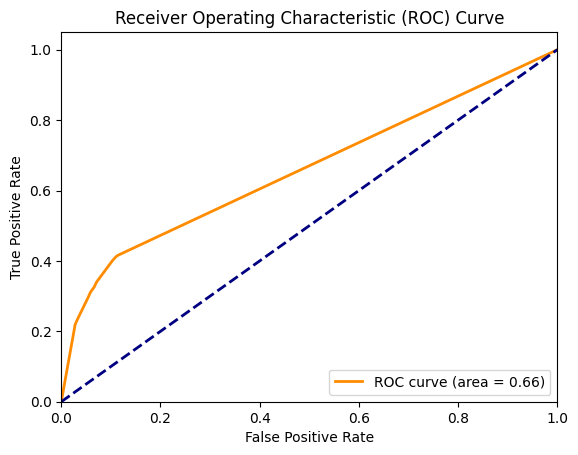

In [25]:
from sklearn.metrics import accuracy_score, f1_score, classification_report, roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

# Assuming X_train, X_test, y_train, y_test are defined and split appropriately

clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_train, y_train)

y_pred0 = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred0))
print('F1-score %s' % f1_score(y_test, y_pred0, average=None))
print(classification_report(y_test, y_pred0))

# Get predicted probabilities for the positive class (if available)
y_score = clf.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [29]:
# storing class 1 ROC curve for successive comparisons
y_score = clf.predict_proba(X_test)
fpr0, tpr0, _ = roc_curve(y_test, y_score[:, 1])
roc_auc0 = auc(fpr0, tpr0)

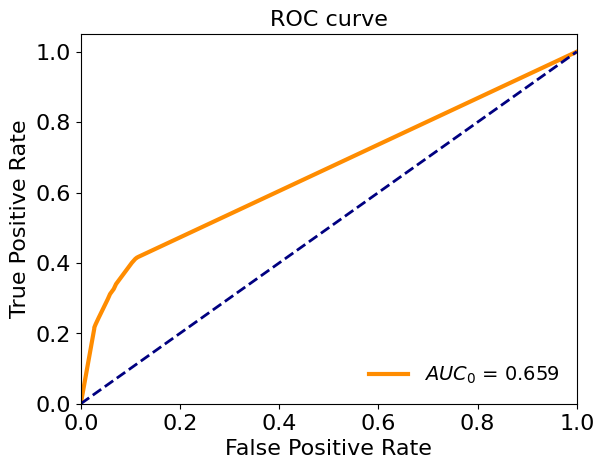

In [30]:
plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

In [31]:
def plot_ROC_comparison(fpr, tpr):
    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
    plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))
    
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.title('ROC curve', fontsize=16)
    plt.legend(loc="lower right", fontsize=14, frameon=False)
    plt.tick_params(axis='both', which='major', labelsize=16)
    plt.show()

# PCA

In [32]:
from sklearn.decomposition import PCA

In [33]:
def plot_pca(X_pca, y_train):
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
    plt.show()

In [34]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_pca = pca.transform(X_train)
print(X_train.shape, X_pca.shape)

(62693, 9) (62693, 2)


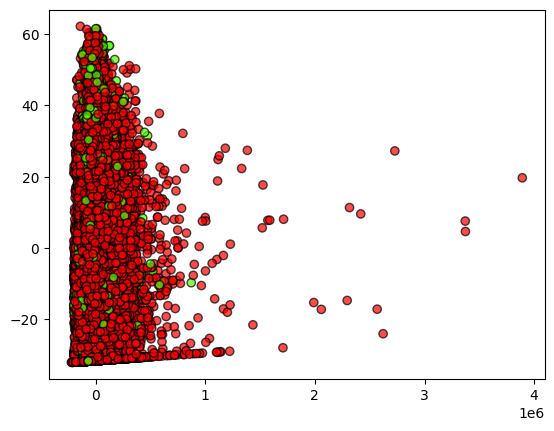

In [35]:
plot_pca(X_pca, y_train)

# UNDERSAMPLING

In [36]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import CondensedNearestNeighbour
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import EditedNearestNeighbours

#### Random Undersampling

In [37]:
rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({False: 5444, True: 5444})


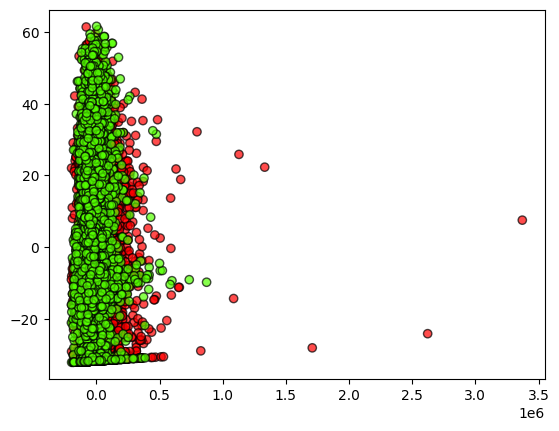

In [38]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_pca = pca.transform(X_res)
plot_pca(X_pca, y_res)

Resampled dataset shape Counter({False: 5444, True: 5444})


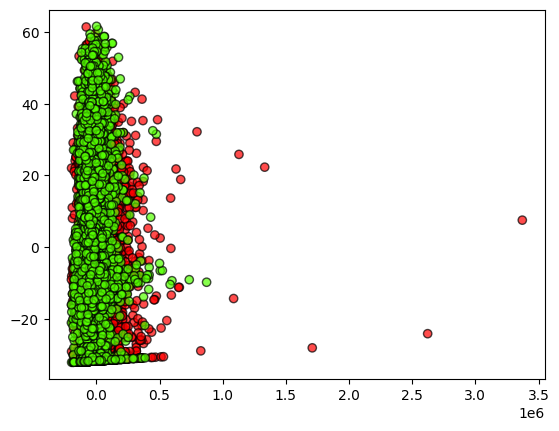

Accuracy 0.7057947820908854
F1-score [0.81463243 0.28738844]
              precision    recall  f1-score   support

       False       0.96      0.71      0.81     24536
        True       0.18      0.68      0.29      2333

    accuracy                           0.71     26869
   macro avg       0.57      0.70      0.55     26869
weighted avg       0.89      0.71      0.77     26869



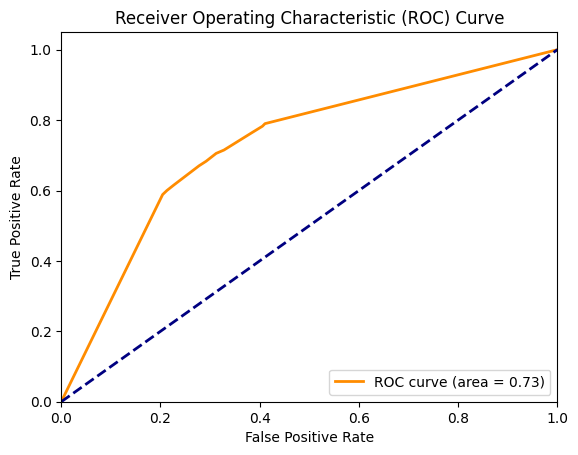

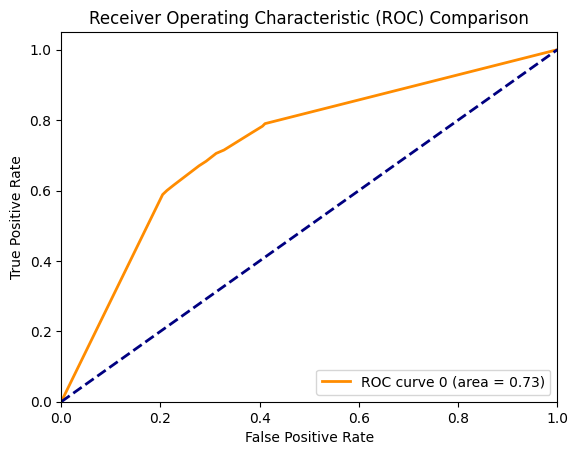

In [50]:
from sklearn.metrics import accuracy_score, f1_score, classification_report, roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

def plot_ROC_comparison(fpr_list, tpr_list):
    plt.figure()
    lw = 2
    colors = ['darkorange', 'green', 'blue', 'red']  # Add more colors if needed
    for i, (fpr, tpr) in enumerate(zip(fpr_list, tpr_list)):
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, color=colors[i % len(colors)],
                 lw=lw, label='ROC curve %d (area = %0.2f)' % (i, roc_auc))
    
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Comparison')
    plt.legend(loc="lower right")
    plt.show()


# Assuming X_train, X_test, y_train, y_test are defined and split appropriately

rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

pca = PCA(n_components=2)
pca.fit(X_train)
X_pca = pca.transform(X_res)

# Plot PCA if plot_pca function is defined
plot_pca(X_pca, y_res)

# Fit Decision Tree classifier on resampled data
clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_res, y_res)

# Predict on test set
y_pred = clf.predict(X_test)

# Evaluate performance
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

# Plot ROC curve for the Decision Tree classifier
y_score = clf.predict_proba(X_test)[:, 1]
plot_roc(y_test.values.ravel(), y_score)
plt.show()

# roc comparison
fpr, tpr, _ = roc_curve(y_test.values.ravel(), y_score)
plot_ROC_comparison([fpr], [tpr])
plt.show()



Tomek Links

In [53]:
tl = TomekLinks()
X_res, y_res = tl.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({False: 54703, True: 5444})


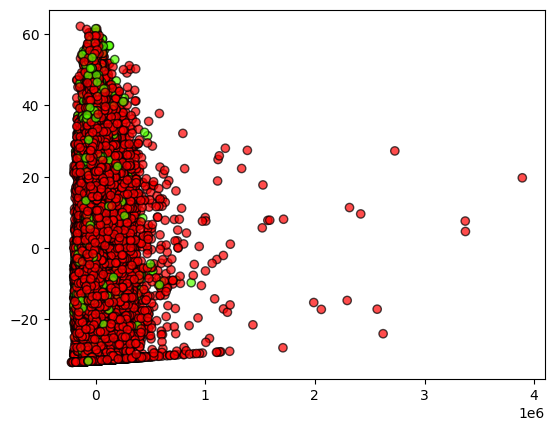

In [54]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_pca = pca.transform(X_res)
plot_pca(X_pca, y_res)

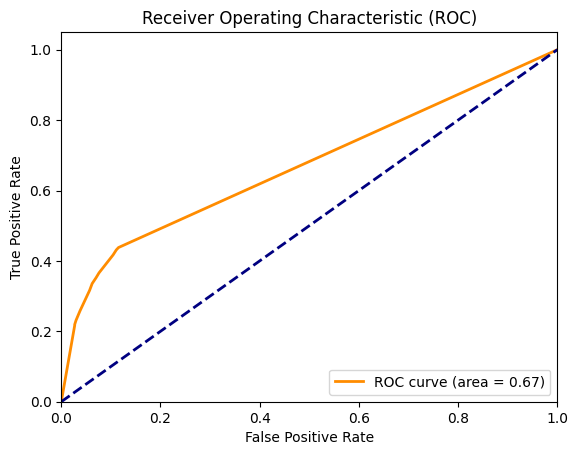

In [57]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming plot_roc function is defined somewhere
def plot_roc(fpr, tpr):
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()

# Assuming clf and X_test are already defined
clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_res, y_res)

# Predict probabilities
y_score = clf.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])  # Use y_score[:, 1] for positive class probabilities
plot_roc(fpr, tpr)


Cluster Centroids

In [58]:
from sklearn.cluster import MiniBatchKMeans
from imblearn.under_sampling import ClusterCentroids

In [59]:
cc = ClusterCentroids(
    estimator=MiniBatchKMeans(n_init=1, random_state=0), random_state=42
)
X_res, y_res = cc.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({False: 5444, True: 5444})


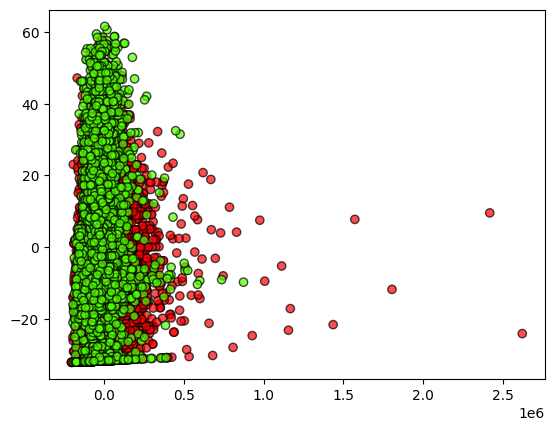

In [60]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_pca = pca.transform(X_res)
plot_pca(X_pca, y_res)

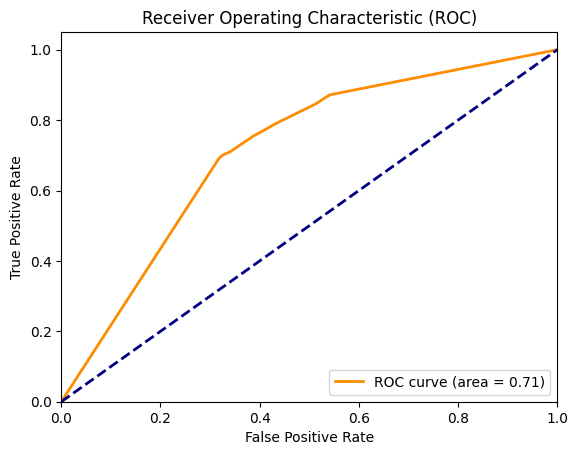

In [62]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming plot_roc function is defined somewhere
def plot_roc(fpr, tpr):
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()

# Assuming clf and X_test are already defined
clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_res, y_res)

# Predict probabilities
y_score = clf.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])  # Use y_score[:, 1] for positive class probabilities
plot_roc(fpr, tpr)


Oversampling

In [63]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN

### RandomOverSampler

In [64]:
ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({False: 57249, True: 57249})


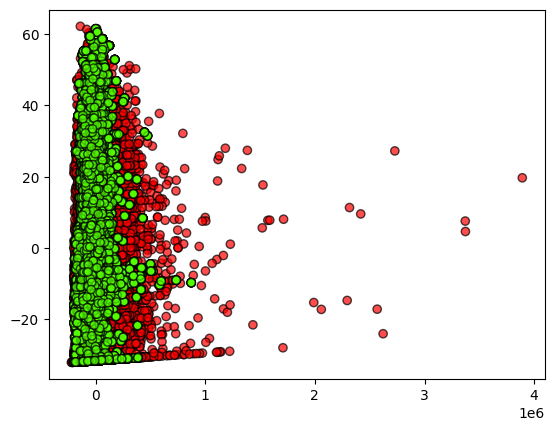

In [65]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_pca = pca.transform(X_res)
plot_pca(X_pca, y_res)

Resampled dataset shape Counter({False: 57249, True: 57249})


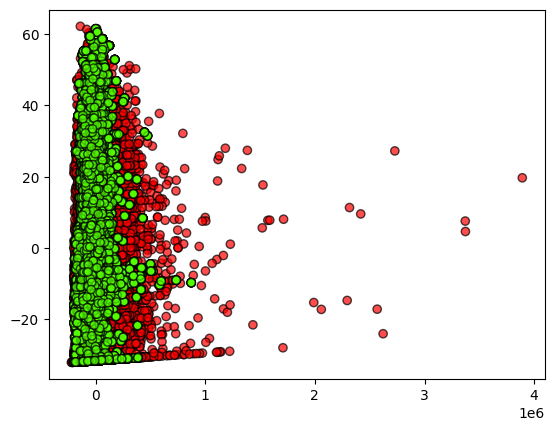

Accuracy 0.8746138672819979
F1-score [0.93060047 0.35124206]
              precision    recall  f1-score   support

       False       0.94      0.92      0.93     24536
        True       0.32      0.39      0.35      2333

    accuracy                           0.87     26869
   macro avg       0.63      0.66      0.64     26869
weighted avg       0.89      0.87      0.88     26869



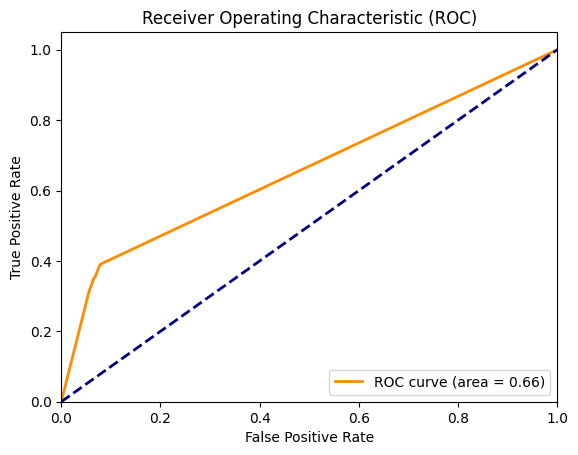

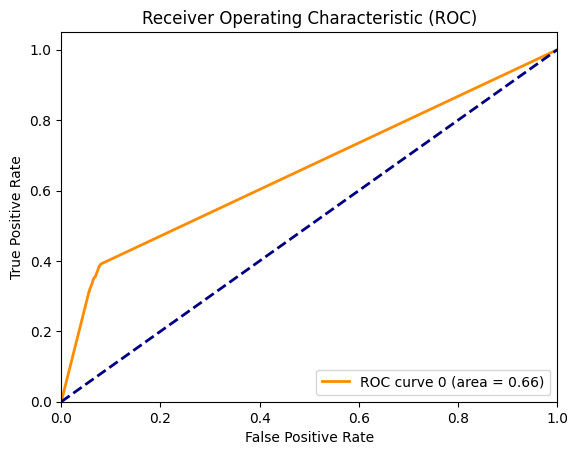

In [68]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Assuming plot_roc and plot_ROC_comparison functions are defined somewhere
def plot_roc(fpr, tpr):
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()

def plot_ROC_comparison(fpr_list, tpr_list):
    colors = ['darkorange', 'green', 'blue', 'red']  # Add more colors if needed
    for i, (fpr, tpr) in enumerate(zip(fpr_list, tpr_list)):
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, color=colors[i % len(colors)],
                 lw=2, label='ROC curve %d (area = %0.2f)' % (i, roc_auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()

# Assuming X_train, y_train, X_test, y_test are defined

# Resample using RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

# PCA for dimensionality reduction
pca = PCA(n_components=2)
pca.fit(X_train)
X_pca = pca.transform(X_res)

# Plot PCA (assuming plot_pca function is defined)
plot_pca(X_pca, y_res)

# Train a decision tree classifier
clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_res, y_res)

# Predict on test set
y_pred = clf.predict(X_test)
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

# Compute ROC curve and plot
y_score = clf.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])

# Plot single ROC curve
plot_roc(fpr, tpr)

# Plot comparison ROC curve
plot_ROC_comparison([fpr], [tpr])


SMOTE

In [69]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({False: 57249, True: 57249})


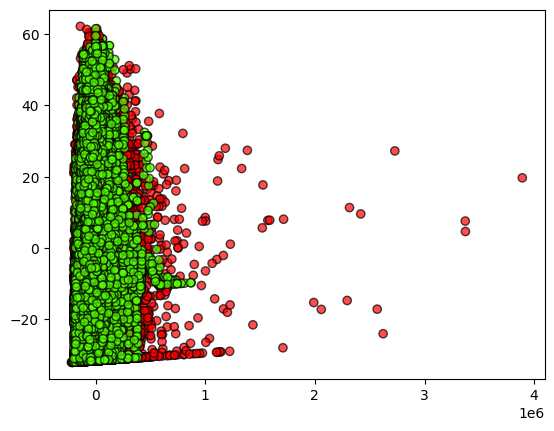

In [70]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_pca = pca.transform(X_res)
plot_pca(X_pca, y_res)

Resampled dataset shape Counter({False: 57249, True: 57249})


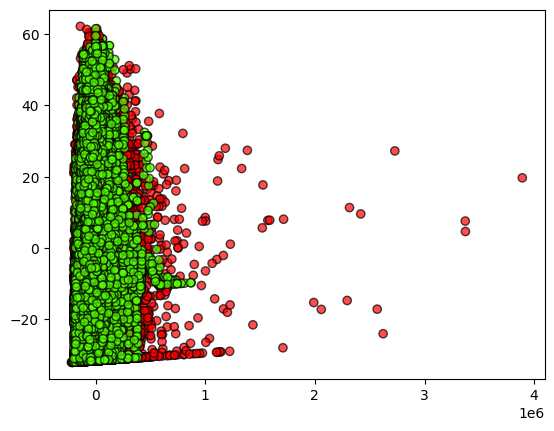

Accuracy 0.8057985038520228
F1-score [0.88683583 0.31594127]
              precision    recall  f1-score   support

       False       0.95      0.83      0.89     24536
        True       0.23      0.52      0.32      2333

    accuracy                           0.81     26869
   macro avg       0.59      0.67      0.60     26869
weighted avg       0.89      0.81      0.84     26869



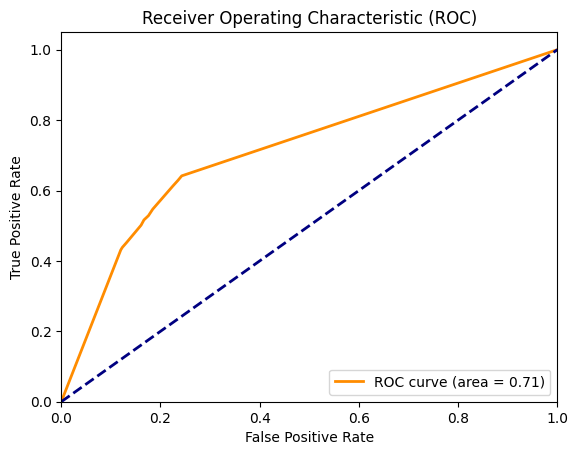

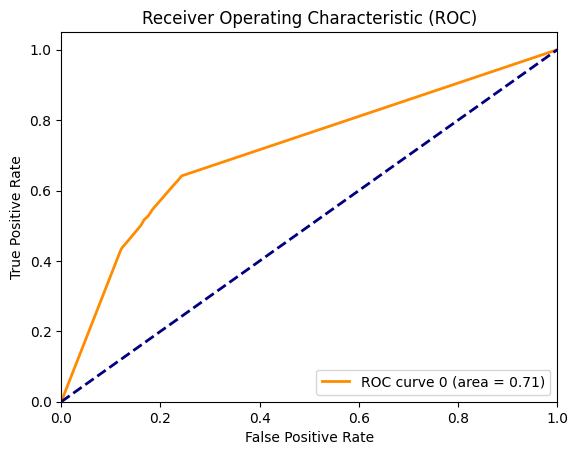

In [72]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Assuming plot_roc and plot_ROC_comparison functions are defined somewhere
def plot_roc(fpr, tpr):
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()

def plot_ROC_comparison(fpr_list, tpr_list):
    colors = ['darkorange', 'green', 'blue', 'red']  # Add more colors if needed
    for i, (fpr, tpr) in enumerate(zip(fpr_list, tpr_list)):
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, color=colors[i % len(colors)],
                 lw=2, label='ROC curve %d (area = %0.2f)' % (i, roc_auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()

# Assuming X_train, y_train, X_test, y_test are defined

# Resample using SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

# PCA for dimensionality reduction
pca = PCA(n_components=2)
pca.fit(X_train)
X_pca = pca.transform(X_res)

# Plot PCA (assuming plot_pca function is defined)
plot_pca(X_pca, y_res)

# Train a decision tree classifier
clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_res, y_res)

# Predict on test set
y_pred = clf.predict(X_test)
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

# Compute ROC curve and plot
y_score = clf.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])

# Plot single ROC curve
plot_roc(fpr, tpr)

# Plot comparison ROC curve
plot_ROC_comparison([fpr], [tpr])


ADASYN

In [73]:
ada = ADASYN(random_state=42)
X_res, y_res = ada.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({True: 57605, False: 57249})


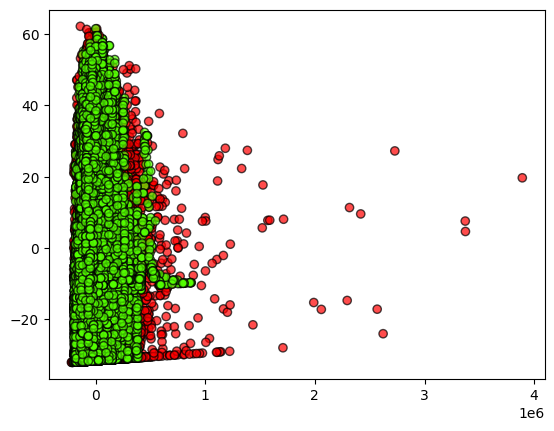

In [74]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_pca = pca.transform(X_res)
plot_pca(X_pca, y_res)

Resampled dataset shape Counter({True: 57605, False: 57249})


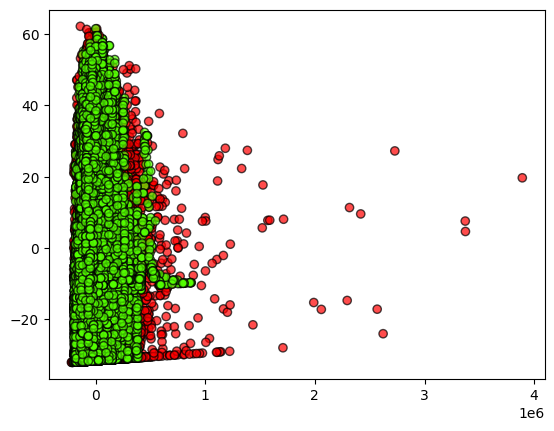

Accuracy 0.8029327477762477
F1-score [0.88496883 0.31296224]
              precision    recall  f1-score   support

       False       0.95      0.83      0.88     24536
        True       0.22      0.52      0.31      2333

    accuracy                           0.80     26869
   macro avg       0.59      0.67      0.60     26869
weighted avg       0.88      0.80      0.84     26869



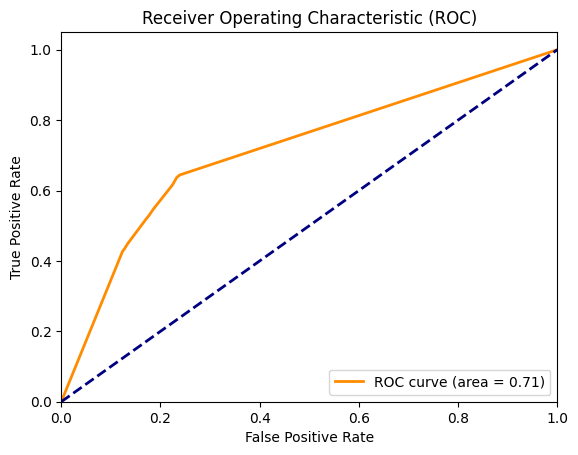

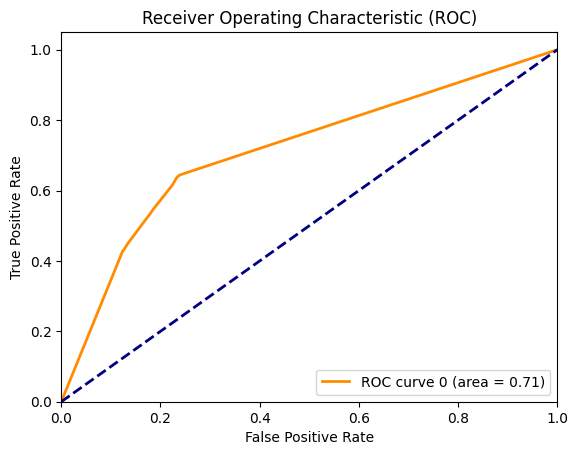

In [76]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from imblearn.over_sampling import ADASYN
from collections import Counter
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Assuming plot_roc and plot_ROC_comparison functions are defined somewhere
def plot_roc(fpr, tpr):
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()

def plot_ROC_comparison(fpr_list, tpr_list):
    colors = ['darkorange', 'green', 'blue', 'red']  # Add more colors if needed
    for i, (fpr, tpr) in enumerate(zip(fpr_list, tpr_list)):
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, color=colors[i % len(colors)],
                 lw=2, label='ROC curve %d (area = %0.2f)' % (i, roc_auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()

# Assuming X_train, y_train, X_test, y_test are defined

# Resample using ADASYN
ada = ADASYN(random_state=42)
X_res, y_res = ada.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

# PCA for dimensionality reduction
pca = PCA(n_components=2)
pca.fit(X_train)
X_pca = pca.transform(X_res)

# Plot PCA (assuming plot_pca function is defined)
plot_pca(X_pca, y_res)

# Train a decision tree classifier
clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_res, y_res)

# Predict on test set
y_pred = clf.predict(X_test)
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

# Compute ROC curve and plot
y_score = clf.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])

# Plot single ROC curve
plot_roc(fpr, tpr)

# Plot comparison ROC curve
plot_ROC_comparison([fpr], [tpr])


Corrected Decision Tree

In [77]:
from sklearn.tree._tree import TREE_LEAF

In [78]:
def is_leaf(inner_tree, index):
    # Check whether node is leaf node
    return (inner_tree.children_left[index] == TREE_LEAF and
            inner_tree.children_right[index] == TREE_LEAF)


def prune_index(inner_tree, decisions, index=0):
    # Start pruning from the bottom - if we start from the top, we might miss
    # nodes that become leaves during pruning.
    # Do not use this directly - use prune_duplicate_leaves instead.
    if not is_leaf(inner_tree, inner_tree.children_left[index]):
        prune_index(inner_tree, decisions, inner_tree.children_left[index])
    if not is_leaf(inner_tree, inner_tree.children_right[index]):
        prune_index(inner_tree, decisions, inner_tree.children_right[index])

    # Prune children if both children are leaves now and make the same decision:
    if (is_leaf(inner_tree, inner_tree.children_left[index]) and
        is_leaf(inner_tree, inner_tree.children_right[index]) and
        (decisions[index] == decisions[inner_tree.children_left[index]]) and
        (decisions[index] == decisions[inner_tree.children_right[index]])):
        # turn node into a leaf by "unlinking" its children
        inner_tree.children_left[index] = TREE_LEAF
        inner_tree.children_right[index] = TREE_LEAF
        # print("Pruned {}".format(index))


def prune_duplicate_leaves(dt):
    # Remove leaves if both
    decisions = dt.tree_.value.argmax(axis=2).flatten().tolist()  # Decision for each node
    prune_index(dt.tree_, decisions)

# UNDERSTAMPLE 

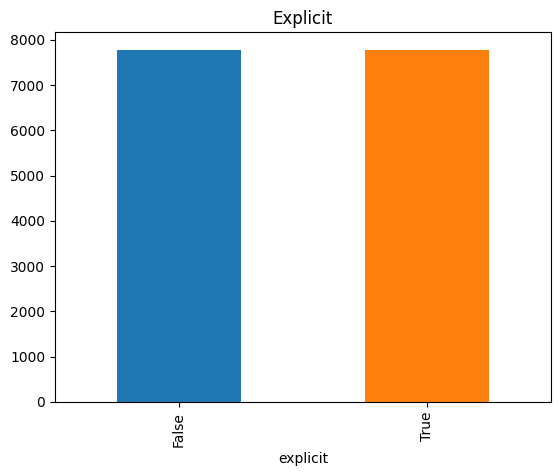

In [14]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(sampling_strategy = 1)
X_res, y_res = rus.fit_resample(X, y)

ax = y_res.value_counts().plot(kind='bar', title='Explicit', color=['tab:blue', 'tab:orange'])
_ = ax.set_title('Explicit')

In [7]:
y_res.value_counts()

NameError: name 'y_res' is not defined

# Classification dell'under sampling

In [43]:
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [44]:
from sklearn.dummy import DummyClassifier

In [45]:
clf = DummyClassifier()
clf.fit(X_train, y_train)

y_pred0 = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred0))
print('F1-score %s' % f1_score(y_test, y_pred0, average=None))
print(classification_report(y_test, y_pred0))

Accuracy 0.49989286479537176
F1-score [0.         0.66657143]
              precision    recall  f1-score   support

       False       0.00      0.00      0.00      2334
        True       0.50      1.00      0.67      2333

    accuracy                           0.50      4667
   macro avg       0.25      0.50      0.33      4667
weighted avg       0.25      0.50      0.33      4667



C:\Users\marti\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\marti\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\marti\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classificati

Decision Tree Classifier Accuracy: 0.6978787229483608
Decision Tree Classifier F1-score: [0.69454073 0.70114455]
Decision Tree Classifier Report:
              precision    recall  f1-score   support

       False       0.70      0.69      0.69      2334
        True       0.69      0.71      0.70      2333

    accuracy                           0.70      4667
   macro avg       0.70      0.70      0.70      4667
weighted avg       0.70      0.70      0.70      4667



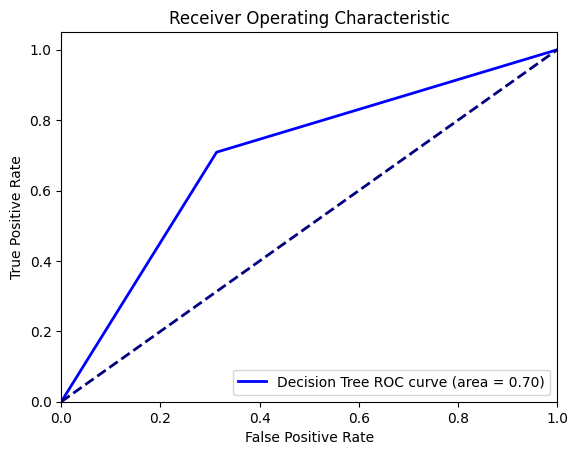

In [52]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, classification_report, roc_curve, auc
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier

# Initialize and train a real classifier (Decision Tree in this case)
real_clf = DecisionTreeClassifier()
real_clf.fit(X_train, y_train)

# Make predictions with the real classifier
y_pred_real = real_clf.predict(X_test)

# Print accuracy and F1 score for the real classifier
print('Decision Tree Classifier Accuracy: %s' % accuracy_score(y_test, y_pred_real))
print('Decision Tree Classifier F1-score: %s' % f1_score(y_test, y_pred_real, average=None))
print('Decision Tree Classifier Report:')
print(classification_report(y_test, y_pred_real))

# Get the probability scores for the ROC curve for the real classifier
y_score_real = real_clf.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC for DummyClassifier
fpr_dummy, tpr_dummy, _ = roc_curve(y_test, y_score_dummy)
roc_auc_dummy = auc(fpr_dummy, tpr_dummy)

# Calculate ROC curve and AUC for the real classifier
fpr_real, tpr_real, _ = roc_curve(y_test, y_score_real)
roc_auc_real = auc(fpr_real, tpr_real)

# Plot the ROC curves
plt.figure()
plt.plot(fpr_real, tpr_real, color='blue', lw=2, label='Decision Tree ROC curve (area = %0.2f)' % roc_auc_real)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


In [56]:
clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_train, y_train)

y_pred0 = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred0))
print('F1-score %s' % f1_score(y_test, y_pred0, average=None))
print(classification_report(y_test, y_pred0))

Accuracy 0.6910220698521534
F1-score [0.68989247 0.69214347]
              precision    recall  f1-score   support

       False       0.69      0.69      0.69      2334
        True       0.69      0.69      0.69      2333

    accuracy                           0.69      4667
   macro avg       0.69      0.69      0.69      4667
weighted avg       0.69      0.69      0.69      4667



Accuracy 0.6910220698521534
F1-score [0.68989247 0.69214347]
              precision    recall  f1-score   support

       False       0.69      0.69      0.69      2334
        True       0.69      0.69      0.69      2333

    accuracy                           0.69      4667
   macro avg       0.69      0.69      0.69      4667
weighted avg       0.69      0.69      0.69      4667



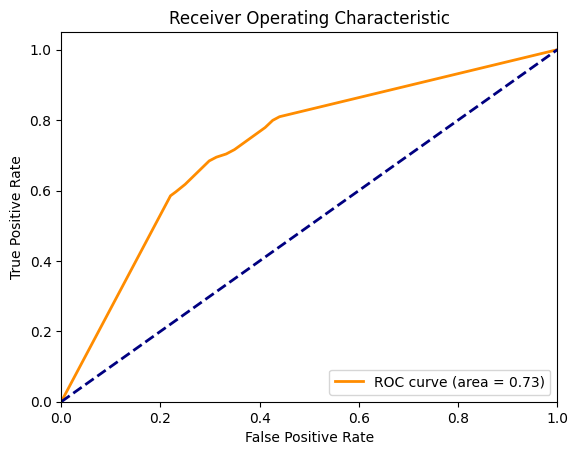

In [57]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, classification_report, roc_curve, auc
from sklearn.tree import DecisionTreeClassifier

# Assuming X_train, y_train, X_test, y_test are already defined

# Initialize and train the DecisionTreeClassifier
clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred0 = clf.predict(X_test)

# Print accuracy and F1 score
print('Accuracy %s' % accuracy_score(y_test, y_pred0))
print('F1-score %s' % f1_score(y_test, y_pred0, average=None))
print(classification_report(y_test, y_pred0))

# Get the probability scores for the ROC curve
y_score = clf.predict_proba(X_test)[:, 1]  # Taking the probability of the positive class

# Calculate ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


In [16]:
y_res.value_counts()

explicit
False    81785
True     81785
Name: count, dtype: int64

# PCA

In [58]:
from sklearn.decomposition import PCA

In [59]:
def plot_pca(X_pca, y_train):
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
    plt.show()

In [60]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_pca = pca.transform(X_train)
print(X_train.shape, X_pca.shape)

(10887, 9) (10887, 2)


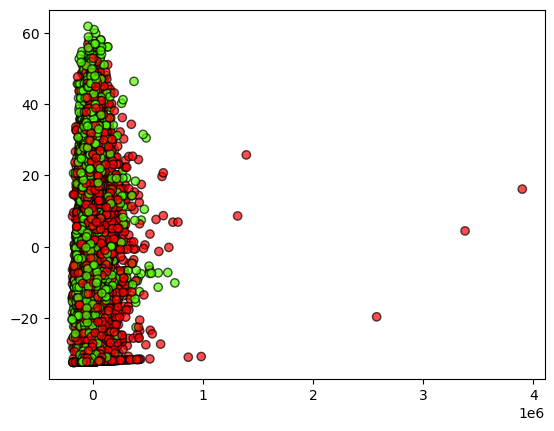

In [61]:
plot_pca(X_pca, y_train)

Resampled dataset shape Counter({False: 5443, True: 5443})


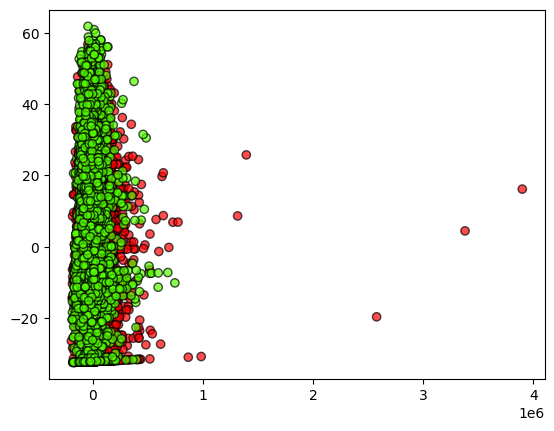

In [67]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import CondensedNearestNeighbour
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import EditedNearestNeighbours

rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))
pca = PCA(n_components=2)
pca.fit(X_train)
X_pca = pca.transform(X_res)
plot_pca(X_pca, y_res)